Data loading and exploration

In [1659]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter

In [1660]:
# Load datasets
vgSalesDF = pd.read_csv('vgsales.csv')
popGamesDF = pd.read_csv('backloggd_games.csv')
crimeNA = pd.read_csv('by_offense_usafacts.csv')

In [1661]:
vgSalesDF.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [1662]:
popGamesDF.head(10)

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,0,Elden Ring,"Feb 25, 2022","['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,2,Hades,"Dec 07, 2018",['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,3,Hollow Knight,"Feb 24, 2017",['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,4,Undertale,"Sep 15, 2015","['tobyfox', '8-4']","A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K
5,5,Minecraft,"Nov 18, 2011",['Mojang Studios'],Minecraft focuses on allowing the player to ex...,"['Windows PC', 'Mac', 'Linux']","['Adventure', 'Simulator']",4.3,38K,2.1K,1.3K,265,2.6K,2.7K
6,6,Omori,"Dec 25, 2020","['OMOCAT', 'PLAYISM']",A turn-based surreal horror RPG in which a chi...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.1,8.7K,1.2K,5.3K,4.3K,1.8K,1.4K
7,7,The Legend of Zelda: Tears of the Kingdom,"May 12, 2023",['Nintendo'],The Legend of Zelda: Tears of the Kingdom is t...,['Nintendo Switch'],['Adventure'],4.6,4.3K,4.6K,3K,5.2K,1.9K,1.1K
8,8,Resident Evil 4,"Mar 24, 2023","['Capcom', 'Capcom Development Division 1']",Resident Evil 4 is a remake of the 2005 origin...,"['Windows PC', 'PlayStation 4', 'PlayStation 5...","['Adventure', 'Puzzle', 'Shooter']",4.6,6.1K,908,2.1K,3.5K,1.9K,1.4K
9,9,NieR: Automata,"Feb 23, 2017","['PlatinumGames', 'Square Enix']","NieR: Automata tells the story of androids 2B,...","['Windows PC', 'PlayStation 4']","['Brawler', 'RPG']",4.3,20K,1.3K,7.2K,4K,3.2K,1.4K


In [1663]:
crimeNA.head(10)

,Year,Homicide,Robbery,Aggravated Assault
0,1979,21460,480700,629480
1,1980,23040,565840,672650
2,1981,22520,592910,663900
3,1982,21010,553130,669480
4,1983,19308,506567,653294
5,1984,18692,485008,685349
6,1985,18976,497874,723246
7,1986,20613,542775,834322
8,1987,20096,517704,855088
9,1988,20675,542968,910092


In [1664]:
# Remove missing data
vgSales = vgSalesDF.dropna()
popGames = popGamesDF.dropna()
crimeNA = crimeNA.dropna()

In [1665]:
# Change Column Names
vgSales = vgSales.rename(columns={'Name': 'Title'})
print(popGames.columns)
print(vgSales.columns)

Index(['Unnamed: 0', 'Title', 'Release_Date', 'Developers', 'Summary',
       'Platforms', 'Genres', 'Rating', 'Plays', 'Playing', 'Backlogs',
       'Wishlist', 'Lists', 'Reviews'],
      dtype='object')
Index(['Rank', 'Title', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


In [1666]:
# Merge Video Games Dataset
merged = pd.merge(vgSales, popGames, on="Title", how="inner")
merged.columns

Index(['Rank', 'Title', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Unnamed: 0',
       'Release_Date', 'Developers', 'Summary', 'Platforms', 'Genres',
       'Rating', 'Plays', 'Playing', 'Backlogs', 'Wishlist', 'Lists',
       'Reviews'],
      dtype='object')

In [1667]:
# Drop Unwanted Columns
dropCols = ['Year', 'Genre', 'Unnamed: 0', 'Summary', 'Lists', 'Reviews', 'Backlogs', 'Wishlist', 'Platform', 'Developers', 'Platforms', 'Publisher']
for column in dropCols:
    del merged[column]
merged

,Rank,Title,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Release_Date,Genres,Rating,Plays,Playing
0,1,Wii Sports,41.49,29.02,3.77,8.46,82.74,"Nov 19, 2006","['Simulator', 'Sport']",3.7,20K,49
1,2,Super Mario Bros.,29.08,3.58,6.81,0.77,40.24,"Sep 13, 1985","['Adventure', 'Platform']",3.5,20K,75
2,2,Super Mario Bros.,29.08,3.58,6.81,0.77,40.24,"Jul 14, 1993",['Platform'],3.6,423,0
3,2,Super Mario Bros.,29.08,3.58,6.81,0.77,40.24,"Jul 14, 1993",['Platform'],3.6,423,0
4,201,Super Mario Bros.,3.40,1.30,0.15,0.22,5.07,"Sep 13, 1985","['Adventure', 'Platform']",3.5,20K,75
...,...,...,...,...,...,...,...,...,...,...,...,...
8710,16560,Dramatical Murder Re:code,0.00,0.00,0.01,0.00,0.01,"Oct 30, 2014","['Adventure', 'Visual Novel']",4.0,8,0
8711,16568,Teslagrad,0.00,0.01,0.00,0.00,0.01,"Dec 13, 2013","['Adventure', 'Indie', 'Platform', 'Puzzle']",2.9,405,9
8712,16586,Carmageddon 64,0.01,0.00,0.00,0.00,0.01,"Dec 31, 1999","['Fighting', 'Racing']",1.2,53,1
8713,16596,Woody Woodpecker in Crazy Castle 5,0.01,0.00,0.00,0.00,0.01,"Jun 30, 2004","['Platform', 'Puzzle']",1.4,14,0


In [1668]:
# Drop duplicate rows
merged = merged.drop_duplicates()
crimeNA = crimeNA.drop_duplicates()

indices_to_drop = []
for index, row in merged.iterrows():
    title = row['Title']
    
    release_date = row['Release_Date'] 
    
    global_sales = row['Global_Sales']
    
    duplicates = merged[(merged['Title'] == title) & (merged['Release_Date'] == release_date)]
    duplicates = merged[(merged['Title'] == title) & (merged['Global_Sales'] == global_sales)]

    
    if len(duplicates) > 1:
        indices_to_drop.extend(duplicates.index[1:])

merged = merged.drop(indices_to_drop)

merged

,Rank,Title,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Release_Date,Genres,Rating,Plays,Playing
0,1,Wii Sports,41.49,29.02,3.77,8.46,82.74,"Nov 19, 2006","['Simulator', 'Sport']",3.7,20K,49
1,2,Super Mario Bros.,29.08,3.58,6.81,0.77,40.24,"Sep 13, 1985","['Adventure', 'Platform']",3.5,20K,75
4,201,Super Mario Bros.,3.40,1.30,0.15,0.22,5.07,"Sep 13, 1985","['Adventure', 'Platform']",3.5,20K,75
7,3,Mario Kart Wii,15.85,12.88,3.79,3.31,35.82,"Apr 10, 2008",['Racing'],3.9,21K,107
9,4,Wii Sports Resort,15.75,11.01,3.28,2.96,33.00,"Jul 24, 2009",['Sport'],3.9,8K,30
...,...,...,...,...,...,...,...,...,...,...,...,...
8709,16559,Super Robot Taisen: Original Generation,0.01,0.00,0.00,0.00,0.01,"Nov 22, 2002","['RPG', 'Simulator', 'Strategy', 'Tactical']",3.6,82,2
8710,16560,Dramatical Murder Re:code,0.00,0.00,0.01,0.00,0.01,"Oct 30, 2014","['Adventure', 'Visual Novel']",4.0,8,0
8711,16568,Teslagrad,0.00,0.01,0.00,0.00,0.01,"Dec 13, 2013","['Adventure', 'Indie', 'Platform', 'Puzzle']",2.9,405,9
8712,16586,Carmageddon 64,0.01,0.00,0.00,0.00,0.01,"Dec 31, 1999","['Fighting', 'Racing']",1.2,53,1


In [1669]:
# Sort by Rank, so best selling is first
merged.sort_values(by='Rank', ascending=True, inplace=True)
merged

,Rank,Title,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Release_Date,Genres,Rating,Plays,Playing
0,1,Wii Sports,41.49,29.02,3.77,8.46,82.74,"Nov 19, 2006","['Simulator', 'Sport']",3.7,20K,49
1,2,Super Mario Bros.,29.08,3.58,6.81,0.77,40.24,"Sep 13, 1985","['Adventure', 'Platform']",3.5,20K,75
7,3,Mario Kart Wii,15.85,12.88,3.79,3.31,35.82,"Apr 10, 2008",['Racing'],3.9,21K,107
9,4,Wii Sports Resort,15.75,11.01,3.28,2.96,33.00,"Jul 24, 2009",['Sport'],3.9,8K,30
10,6,Tetris,23.20,2.26,4.22,0.58,30.26,"Nov 01, 1989","['Arcade', 'Puzzle']",4.1,11K,60
...,...,...,...,...,...,...,...,...,...,...,...,...
8711,16568,Teslagrad,0.00,0.01,0.00,0.00,0.01,"Dec 13, 2013","['Adventure', 'Indie', 'Platform', 'Puzzle']",2.9,405,9
8712,16586,Carmageddon 64,0.01,0.00,0.00,0.00,0.01,"Dec 31, 1999","['Fighting', 'Racing']",1.2,53,1
8189,16594,Myst IV: Revelation,0.01,0.00,0.00,0.00,0.01,"Oct 01, 2004","['Adventure', 'Puzzle']",3.3,74,1
8713,16596,Woody Woodpecker in Crazy Castle 5,0.01,0.00,0.00,0.00,0.01,"Jun 30, 2004","['Platform', 'Puzzle']",1.4,14,0


Text(0.5, 1.0, 'Top 5 Most Sold Video Games')

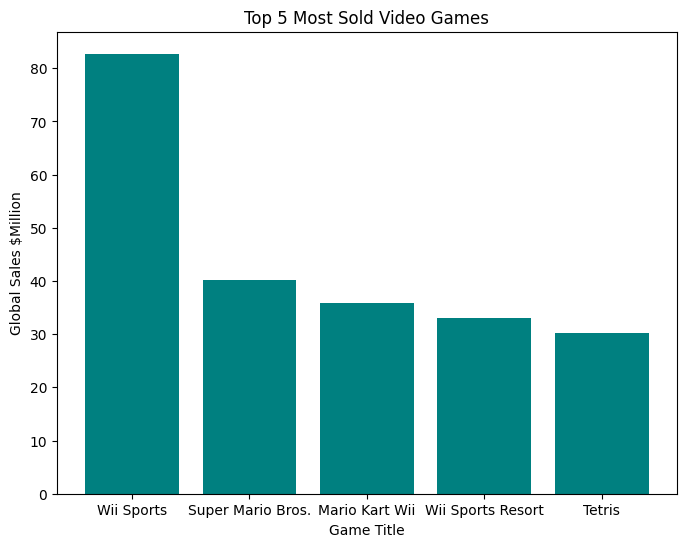

In [1670]:
# GRAPH 1
selectedRows = merged.head(5)

catagories = selectedRows['Title']
values = selectedRows['Global_Sales']

plt.figure(figsize=(8,6))
plt.bar(catagories, values, color='teal')
plt.xlabel('Game Title')
plt.ylabel('Global Sales $Million')
plt.title('Top 5 Most Sold Video Games')


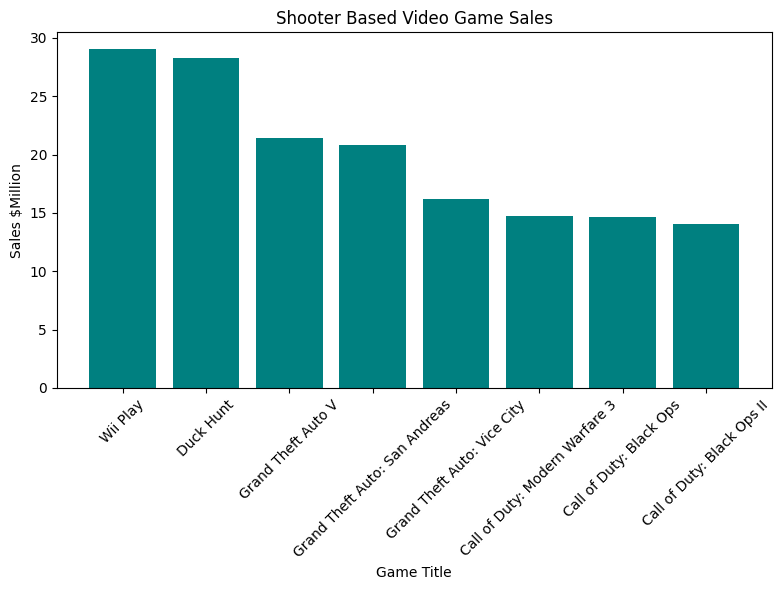

In [1671]:
# GRAPH 2

filtered_merged = merged[merged['Genres'].apply(lambda x: 'Shooter' in x)].head(10)

categories = filtered_merged['Title']
values = filtered_merged['Global_Sales']

plt.figure(figsize=(8, 6))
plt.bar(categories, values, color='teal')
plt.xlabel('Game Title')
plt.ylabel('Sales $Million')
plt.title('Shooter Based Video Game Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

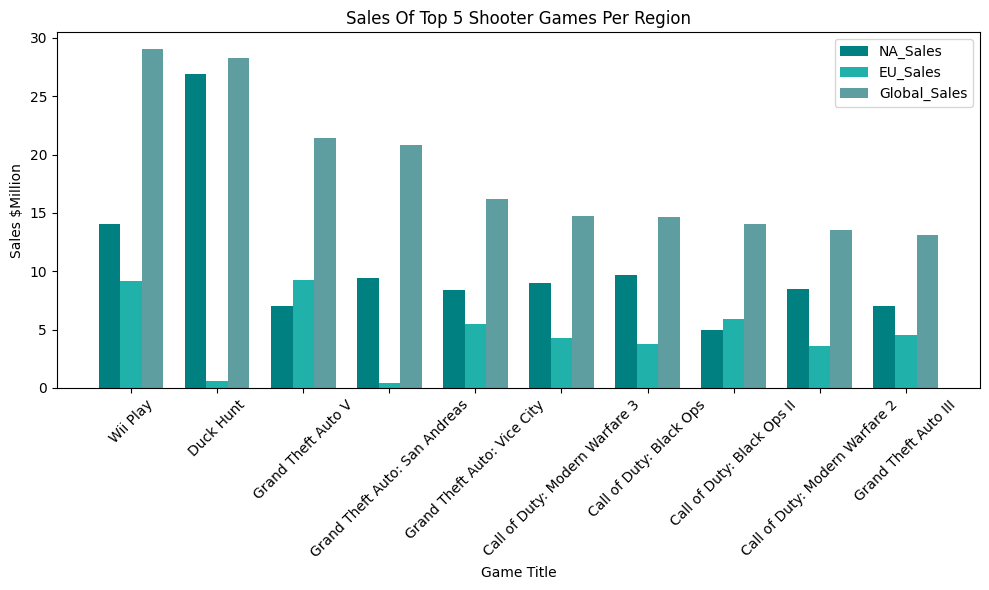

In [1686]:
# GRAPH 4
shooter_games = merged[merged['Genres'].apply(lambda x: 'Shooter' in x)]
shooter_games = shooter_games.drop_duplicates(subset='Title', keep='first')


sales_columns = ['NA_Sales', 'EU_Sales', 'Global_Sales']
sales_data = shooter_games.head(10)[sales_columns]

categories = shooter_games.head(10)['Title']  

plt.figure(figsize=(10, 6))
bar_width = 0.25
index = range(len(categories))
colors = ['teal','lightseagreen', 'cadetblue']

for i, col in enumerate(sales_columns):
    plt.bar([x + i * bar_width for x in index], sales_data[col], width=bar_width, label=col, color=colors[i])


plt.xlabel('Game Title')
plt.ylabel('Sales $Million')
plt.title('Sales Of Top 10 Shooter Games Per Region')
plt.xticks([r + bar_width for r in range(len(categories))], categories, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [1674]:
shooter_rows = merged[merged['Genres'].apply(lambda x: 'Shooter' in x)].head(20)
shooter_rows = shooter_rows.drop_duplicates(subset='Title', keep='first')
shooter_rows


,Rank,Title,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Release_Date,Genres,Rating,Plays,Playing
35,8,Wii Play,14.03,9.20,2.93,2.85,29.02,"Dec 02, 2006","['Shooter', 'Sport']",2.9,4.4K,4
38,10,Duck Hunt,26.93,0.63,0.28,0.47,28.31,"Apr 21, 1984","['Arcade', 'Shooter']",3.0,3.5K,1
42,17,Grand Theft Auto V,7.01,9.27,0.97,4.14,21.40,"Sep 17, 2013","['Adventure', 'Shooter']",3.8,35K,958
47,18,Grand Theft Auto: San Andreas,9.43,0.40,0.41,10.57,20.81,"Oct 26, 2004","['Adventure', 'Racing', 'Shooter']",4.1,21K,310
60,25,Grand Theft Auto: Vice City,8.41,5.49,0.47,1.78,16.15,"Oct 27, 2002","['Adventure', 'Arcade', 'Racing', 'Shooter']",3.8,13K,147
65,30,Call of Duty: Modern Warfare 3,9.03,4.28,0.13,1.32,14.76,"Nov 08, 2011","['Adventure', 'Shooter', 'Tactical']",3.3,12K,32
69,32,Call of Duty: Black Ops,9.67,3.73,0.11,1.13,14.64,"Nov 09, 2010",['Shooter'],3.7,16K,57
77,35,Call of Duty: Black Ops II,4.99,5.88,0.65,2.52,14.03,"Nov 12, 2012",['Shooter'],3.8,15K,66
85,37,Call of Duty: Modern Warfare 2,8.52,3.63,0.08,1.29,13.51,"Nov 10, 2009",['Shooter'],3.8,16K,42
88,39,Grand Theft Auto III,6.99,4.51,0.30,1.30,13.10,"Oct 22, 2001","['Adventure', 'Racing', 'Shooter', 'Simulator']",3.3,8.8K,106


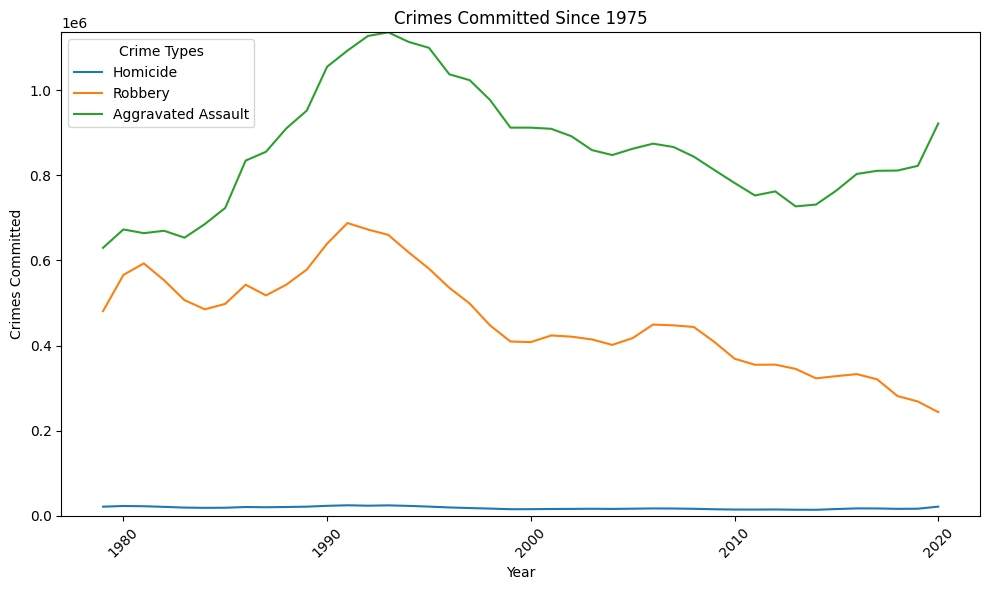

In [1688]:
# GRAPH 5
crimeNA.iloc[:, 1:] = crimeNA.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
max_crime_count = crimeNA.iloc[:, 1:].max().max()
plt.figure(figsize=(10, 6))

for crime_type in crimeNA.columns[1:]:
    plt.plot(crimeNA['Year'], crimeNA[crime_type], label=crime_type,)

plt.ylim(0, max_crime_count)

plt.xlabel('Year')
plt.ylabel('Crimes Committed')
plt.title('Crimes Committed Since 1975')
plt.legend(title='Crime Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

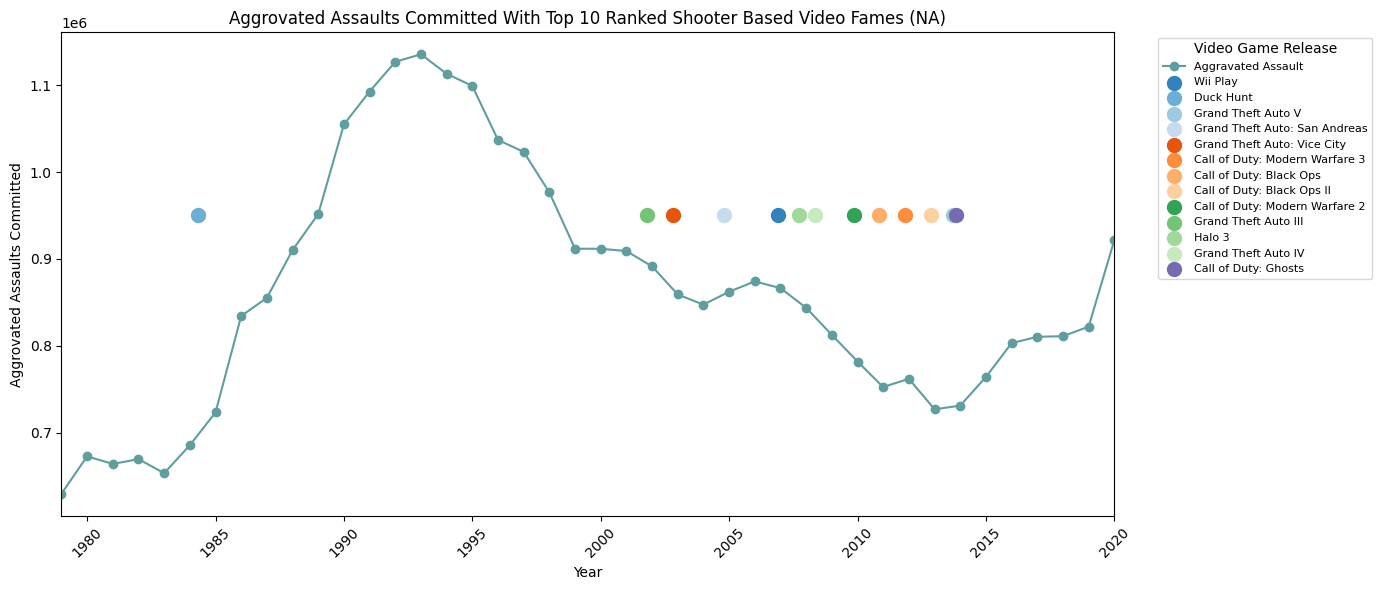

In [1703]:
# GRAPH 6,7,8
# shooter_rows = shooter_rows.head(10)
assault_data['Year'] = pd.to_datetime(assault_data['Year'], format='%Y')
shooter_rows['Release_Date'] = pd.to_datetime(shooter_rows['Release_Date'])

release_position = 950000
colors1 = ['teal','lightseagreen', 'cadetblue']
plt.figure(figsize=(14, 6))
# INTERCHANGABLE FOR 3 GRAPHS, JUST CHANGE WHICH COLUMN USING
#plt.plot(homicide_data['Year'], homicide_data['Homicide'], label='Homicide', marker='o', linestyle='-', color=colors1[0])
#plt.plot(robbery_data['Year'], robbery_data['Robbery'], label='Robbery', marker='o', linestyle='-', color=colors1[1])
plt.plot(assault_data['Year'], assault_data['Aggravated Assault'], label='Aggravated Assault', marker='o', linestyle='-', color=colors1[2])

crime_years_range = (assault_data['Year'].min(), assault_data['Year'].max())
valid_releases = shooter_rows[shooter_rows['Release_Date'].between(*crime_years_range)]

colors = plt.cm.tab20c(range(len(shooter_rows)))
for i, (date, title) in enumerate(zip(shooter_rows['Release_Date'], shooter_rows['Title'])):
    plt.scatter(date, release_position, marker='o', color=colors[i], label=title, s=100)

legend = plt.legend(title='Video Game Release', loc='upper right', prop={'size': 8}, bbox_to_anchor=(1.25, 1))

plt.xlim(assault_data['Year'].min(), assault_data['Year'].max())
plt.xlabel('Year')
plt.ylabel('Aggrovated Assaults Committed')
plt.title('Aggrovated Assaults Committed With Top 10 Ranked Shooter Based Video Fames (NA)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

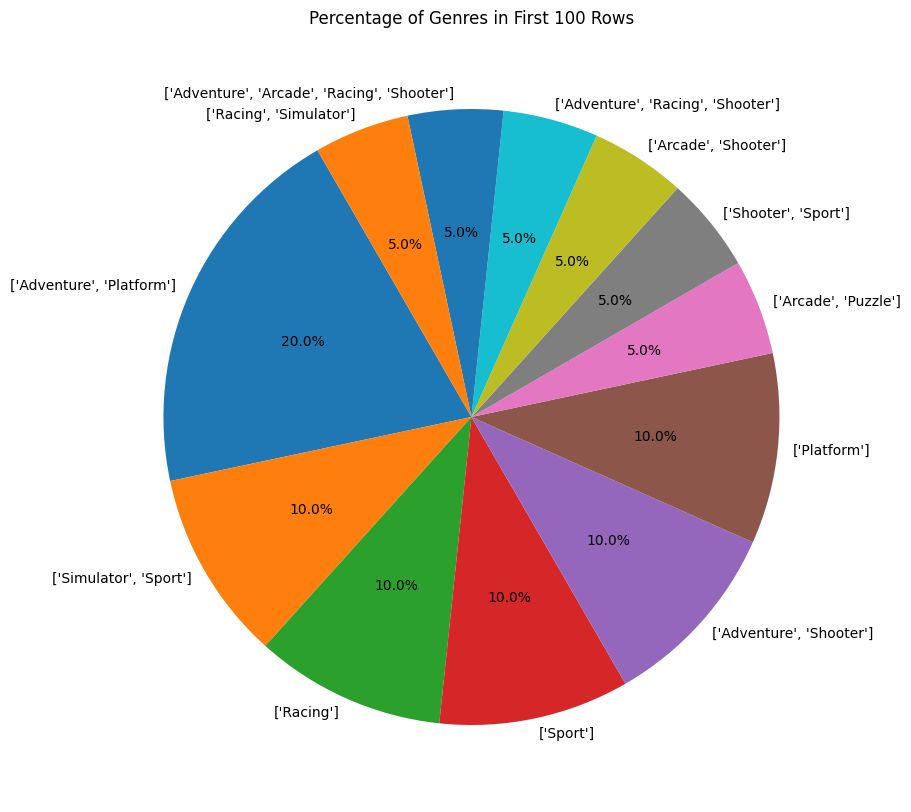

In [1677]:
#GRAPH 9
genres_list = merged['Genres'].iloc[:20].explode()
genre_counts = genres_list.value_counts()

plt.figure(figsize=(15, 10))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', labeldistance=1.05, startangle=120)
plt.title('Percentage of Genres in First 100 Rows')
plt.show()